In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout, BatchNormalization
from keras.models import Sequential,load_model
import keras

In [2]:
train_images = pd.read_csv("../input/emnist/emnist-balanced-train.csv",header=None)
test_images = pd.read_csv("../input/emnist/emnist-balanced-test.csv",header=None)
map_images = pd.read_csv("../input/emnist/emnist-balanced-mapping.txt",header=None) 
#The 1st row would be treated as header if not set header to none.

## EMNIST-Balanced(Extended MNIST) Dataset CSV Structure :
* Each row represents a single image of shape -> (1,784) There are a total of 784 columns.
* The first column contains the labels for each image 
* **Example** : The 0th row in the above dataframe represents and image the pixel for this image starts from 1st column and the point (1,0) i.e 36 is the label for this image in the 0th column.
* In the map_images.txt file 36 maps to 97 which is ASCII Value for "a".
* 47 Labels in map_images represent digits(0->9),alphabets(A-Z & a,b,d,..t).

In [3]:
train_images

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,45,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,36,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,43,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,15,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112795,22,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
112796,17,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
112797,23,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
112798,31,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


a


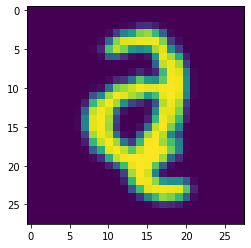

In [4]:
plt.imshow(np.rot90(np.fliplr(train_images.iloc[1,1:].values.reshape(28,28)))) ## We'll learn about this later
print(chr(97)) # 36 in labels column maps to 36 --> 97 in map_images 

## **Data Preprocessing**

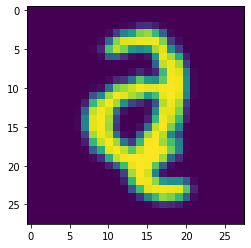

In [5]:
# Seperating labels from features in training and test data.
train_x = train_images.iloc[:,1:]  
train_y = train_images.iloc[:,0]  
train_x = train_x.values

test_x = test_images.iloc[:,1:]
test_y = test_images.iloc[:,0]
test_x = test_x.values

# ascii_map just for the convenince, i've removed the first column in map_images.
ascii_map = []
for i in map_images.values:
    ascii_map.append(i[0].split()[1])

# Uncomment the below line to know about the labels present in our dataset
# for i in ascii_map: 
#     print(chr(int(i)))
plt.imshow(np.rot90(np.fliplr(train_x[1].reshape(28,28))))

In [6]:
# The images in train_images are not in a proper orientation,hence to make them appropriate for training & testing data.

def rot_flip(image):
    image = image.reshape([28, 28])
    image = np.fliplr(image)
    image = np.rot90(image)
    return image

(112800, 28, 28)

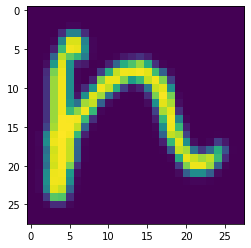

In [7]:
train_x = np.apply_along_axis(rot_flip,1,train_x)
test_x = np.apply_along_axis(rot_flip,1,test_x)
plt.imshow(train_x[2])
train_x.shape

In [8]:
train_x = train_x.astype('float32')
train_x = train_x/255.0

test_x = test_x.astype('float32')
test_x = test_x/255.0

train_x = train_x.reshape(-1, 28,28, 1)   #Equivalent to (112800,28,28,1)
test_x = test_x.reshape(-1, 28,28, 1)   #Equivalent to (18800,28,28,1)

In [9]:
model = Sequential()
model.add(Conv2D(32,(3,3),input_shape = (28,28,1),activation = 'relu'))
model.add(Conv2D(64,(3,3),activation = 'relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(47,activation='softmax'))

In [10]:
model.compile(optimizer = 'adam',loss= "sparse_categorical_crossentropy", metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 9216)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               1179776   
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0

In [11]:
history = model.fit(
    train_x,
    train_y,
    validation_data = (test_x,test_y),
    epochs = 20,
)

Epoch 1/20
3525/3525 [==============================] - 13s 3ms/step - loss: 1.5267 - accuracy: 0.5617 - val_loss: 0.4918 - val_accuracy: 0.8375
Epoch 2/20
3525/3525 [==============================] - 10s 3ms/step - loss: 0.7000 - accuracy: 0.7735 - val_loss: 0.4395 - val_accuracy: 0.8532
Epoch 3/20
3525/3525 [==============================] - 10s 3ms/step - loss: 0.5950 - accuracy: 0.8040 - val_loss: 0.4155 - val_accuracy: 0.8601
Epoch 4/20
3525/3525 [==============================] - 10s 3ms/step - loss: 0.5416 - accuracy: 0.8156 - val_loss: 0.3999 - val_accuracy: 0.8641
Epoch 5/20
3525/3525 [==============================] - 10s 3ms/step - loss: 0.4982 - accuracy: 0.8297 - val_loss: 0.3909 - val_accuracy: 0.8670
Epoch 6/20
3525/3525 [==============================] - 10s 3ms/step - loss: 0.4757 - accuracy: 0.8376 - val_loss: 0.3805 - val_accuracy: 0.8727
Epoch 7/20
3525/3525 [==============================] - 10s 3ms/step - loss: 0.4509 - accuracy: 0.8438 - val_loss: 0.3775 - val_ac

In [12]:
model.save('Balanced-Model.h5')

In [13]:
ascii_map = []
for i in map_images.values:
    ascii_map.append(i[0].split()[1])


# Adding character to associated ASCII Value
character = []
for i in ascii_map:
    character.append(chr(int(i)))
# plt.imshow(np.rot90(np.fliplr(train_x[1].reshape(28,28))))
character = pd.DataFrame(character)

In [14]:
ascii_map = pd.DataFrame(ascii_map)
ascii_map["Character"] = character
ascii_map.to_csv("mapping.csv",index=False,header=True)

In [15]:
from keras.preprocessing import image
import cv2

img_sh_lst = []
img = image.load_img("../input/alphabet-prediction-set/downloada.png",target_size=(28,28))
x = image.img_to_array(img)
print(x.shape)
x = x/255.0

gray_image = cv2.cvtColor(x, cv2.COLOR_BGR2GRAY)
gray_image = np.expand_dims(gray_image, axis=-1)
plt.imshow(gray_image)
gray_image = np.expand_dims(gray_image, axis=0)
cl = model.predict(gray_image)
cl = list(cl[0])

print("Prediction : ",ascii_map["Character"][cl.index(max(cl))])


FileNotFoundError: [Errno 2] No such file or directory: '../input/alphabet-prediction-set/downloada.png'

In [ ]:
print(tf.__version__)